In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import numpy as np
import math
from string import ascii_uppercase

In [2]:
def roundup(x, base=1.):
    return int(math.ceil(x / base)) * base


def rounddown(x, base=1.):
    return int(math.floor(x / base)) * base

In [23]:
def scatter_n_learnt(data, active, ax, x_label, y_label):

    min_leitner = np.min(data.n_recall_leitner)
    min_act = np.min(data.n_recall_act)
    min_v = np.min((min_leitner, min_act))

    max_leitner = np.max(data.n_recall_leitner)
    max_act = np.max(data.n_recall_act)
    max_v = np.max((max_leitner, max_act))

    data = data[data.teacher_md == active]

    data = data.rename(columns={
        "n_recall_leitner": x_label,
        "n_recall_act": y_label
    })

    color = "C1" if active == "threshold" else "C2"

    sns.scatterplot(data=data,
                    x=x_label,
                    y=y_label,
                    color=color,
                    alpha=0.5, s=20,
                    ax=ax)

    ax.plot((min_v, max_v), (min_v, max_v), ls="--", color="black",
            alpha=0.1)

    ax.set_xticks((rounddown(min_v, base=10), roundup(max_v, base=10)))
    ax.set_yticks((rounddown(min_v, base=10), roundup(max_v, base=10)))

    ax.set_aspect(1)


def scatter_n_learnt_n_seen(data, active, ax, x_label, y_label):

    min_leitner = np.min(data.ratio_leitner)
    min_act = np.min(data.ratio_act)
    min_v = np.min((min_leitner, min_act))

    max_leitner = np.max(data.ratio_leitner)
    max_act = np.max(data.ratio_act)
    max_v = np.max((max_leitner, max_act))

    data = data[data.teacher_md == active]

    data = data.rename(columns={
        "ratio_leitner": x_label,
        "ratio_act": y_label
    })

    color = "C1" if active == "threshold" else "C2"

    sns.scatterplot(data=data,
                    x=x_label,
                    y=y_label,
                    alpha=0.5, s=20, color=color, ax=ax)

    ax.plot((min_v, max_v), (min_v, max_v), ls="--", color="black",
            alpha=0.1)

    ax.set_xticks((rounddown(min_v, base=0.10), roundup(max_v, base=0.10)))
    ax.set_yticks((rounddown(min_v, base=0.10), roundup(max_v, base=0.10)))

    ax.set_aspect(1)


def boxplot(df, data_type, ylabel, axes, ylim, fontsize_label):

    color_dic = {"leitner": "C0", "threshold": "C1", "forward": "C2"}
    teacher_names = {"forward": "Cons.\nSampling",
                     "leitner": "Leitner",
                     "threshold": "Myopic"}

    for i, teacher in enumerate(('threshold', 'forward')):
        slc = df.teacher_md == teacher
        df_slc = df[slc]
        user = df_slc["user"]

        if data_type == "n_learnt":
            x = df_slc["n_recall_leitner"]
            y = df_slc["n_recall_act"]
        else:
            x = df_slc["ratio_leitner"]
            y = df_slc["ratio_act"]

        df_plot = pd.DataFrame({"user": user, "leitner": x, teacher: y})

        df_melt = df_plot.melt(id_vars=["user"],
                               value_vars=["leitner", teacher],
                               value_name=ylabel, var_name="teacher")

        ax = axes[i]

        order = ["leitner", teacher]
        colors = [color_dic[o] for o in order]
        ticklabels = [teacher_names[o] for o in order]

        sns.boxplot(data=df_melt, x="teacher", y=ylabel, ax=ax,
                    showfliers=False, order=order, palette=colors,
                    boxprops=dict(alpha=.5))
        sns.lineplot(data=df_melt,
                     x="teacher", y=ylabel, hue="user", alpha=0.4,
                     ax=ax, legend=False, marker="o")

        ax.set_xticklabels(ticklabels, fontsize=fontsize_label)
        ax.set_xlabel("")
        ax.set_ylabel(ylabel, fontsize=fontsize_label)

        ax.set_ylim(ylim)
        ax.set_xlabel("")

    axes[-1].set_ylabel("")

In [19]:
df = pd.read_csv(os.path.join("data", "human", "data_summary.csv"),
                 index_col=0)

df["ratio_leitner"] = df.n_recall_leitner / df.n_eval_leitner
df["ratio_act"] = df.n_recall_act / df.n_eval_act

# Select only the user that complete the task
df = df[df.n_ss_done == 14]

In [20]:
min_leitner = np.min(df.n_recall_leitner)
min_act = np.min(df.n_recall_act)
min_v = np.min((min_leitner, min_act))

max_leitner = np.max(df.n_recall_leitner)
max_act = np.max(df.n_recall_act)
max_v = np.max((max_leitner, max_act))

In [21]:
fig_folder = os.path.join("fig")
os.makedirs(fig_folder, exist_ok=True)

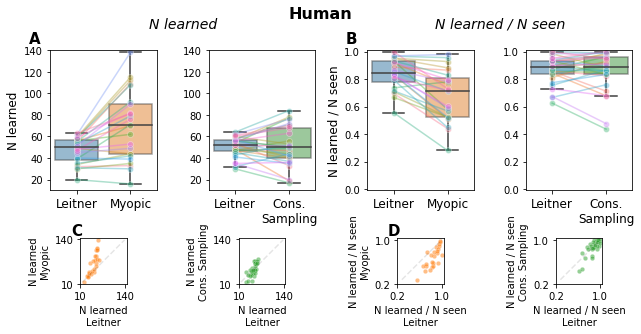

In [24]:
# Parameters plot
fontsize_title = 16
fontsize_subtitle = 14
fontsize_label = 12

fig = plt.figure(figsize=(9, 5))  # 10, 6
fig.suptitle("Human", y=0.92, fontsize=fontsize_title, fontweight='bold',
             verticalalignment='top')

# ...sorry about that
pos = [(3, 4, (1, 5)), (3, 4, (2, 6)),
       (3, 4, (3, 7)), (3, 4, (4, 8)),
       (3, 4, 9), (3, 4, 10),
       (3, 4, 11), (3, 4, 12)]

axes = [fig.add_subplot(*p) for p in pos]

boxplot(df=df, axes=(axes[0], axes[1]),
        data_type="n_learnt",
        ylabel="N learned",
        ylim=(rounddown(min_v, base=10), roundup(max_v, base=10)),
        fontsize_label=fontsize_label)

boxplot(df=df, axes=(axes[2], axes[3]),
        data_type="ratio",
        ylabel="N learned / N seen",
        ylim=(-0.01, 1.01),
        fontsize_label=fontsize_label)

scatter_n_learnt(data=df,
                 active="threshold",
                 x_label="N learned\nLeitner",
                 y_label="N learned\nMyopic",
                 ax=axes[4])

scatter_n_learnt(data=df,
                 active="forward",
                 x_label="N learned\nLeitner",
                 y_label="N learned\nCons. Sampling",
                 ax=axes[5])

scatter_n_learnt_n_seen(data=df,
                        active="threshold",
                        x_label="N learned / N seen\nLeitner",
                        y_label="N learned / N seen\nMyopic",
                        ax=axes[6])

scatter_n_learnt_n_seen(data=df,
                        active="forward",
                        x_label="N learned / N seen\nLeitner",
                        y_label="N learned / N seen\nCons. Sampling",
                        ax=axes[7])

axes[0].text(-0.2, 1.05, ascii_uppercase[0],
             transform=axes[0].transAxes, size=15, weight='bold')
axes[2].text(-0.2, 1.05, ascii_uppercase[1],
             transform=axes[2].transAxes, size=15, weight='bold')
axes[4].text(-0.2, 1.05, ascii_uppercase[2],
             transform=axes[4].transAxes, size=15, weight='bold')
axes[6].text(-0.2, 1.05, ascii_uppercase[3],
             transform=axes[6].transAxes, size=15, weight='bold')

ax = fig.add_subplot(*(3, 4, (1, 6)))
ax.set_axis_off()
ax.set_title("N learned\n", fontstyle='italic', fontsize=fontsize_subtitle)

ax = fig.add_subplot(*(3, 4, (3, 8)))
ax.set_axis_off()
ax.set_title("N learned / N seen\n", fontstyle='italic', fontsize=fontsize_subtitle)

plt.tight_layout(rect=[0, 0, 1, 1.05])

plt.savefig(os.path.join(fig_folder, f"fig4.png"), dpi=300)
plt.savefig(os.path.join(fig_folder, f"fig4.pdf"))

# Statistics

In [8]:
print("Human" + " " + "*"*50)

df = get_user_data()

print(f"n item learnt:")
for teacher in ('threshold', 'forward'):
    x = df[df.teacher_md == teacher]["n_recall_leitner"]
    y = df[df.teacher_md == teacher]["n_recall_act"]
    u, p = stats.mannwhitneyu(
        x=x,
        y=y,
        alternative='two-sided', use_continuity=False)
    print(f"{teacher} // Leitner")
    p_f = f"$p={p:.3f}$" if p >= 0.001 else "$p<0.001$"
    print(f"$u={u}$, {p_f}, $N={len(x)}" + r"\times 2$")

print()
print(f"n learnt / n seen:")
for teacher in ('threshold', 'forward'):
    x = df[df.teacher_md == teacher]["ratio_leitner"]
    y = df[df.teacher_md == teacher]["ratio_act"]
    u, p = stats.mannwhitneyu(
        x=x,
        y=y,
        alternative='two-sided', use_continuity=True)
    print(f"{teacher} // Leitner")
    p_f = f"$p={p:.3f}$" if p >= 0.001 else "$p<0.001$"
    print(f"$u={u}$, {p_f}, $N={len(x)}" + r"\times 2$")

print()
print()


Human **************************************************


NameError: name 'get_user_data' is not defined